<a href="https://colab.research.google.com/github/vinicunhac/fiap_big_data_science/blob/main/linear_regression_with_logarithm_and_polynomial_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Libs

In [55]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as skpp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1. Loading datasets

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/mtcars.csv')
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.shape

(32, 12)

## 2. Dispersion Graph and Corr

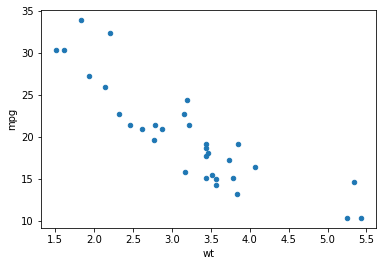

In [80]:
df.plot.scatter(x='wt', y='mpg')

#Transform to log
df['wt_log'] = np.log(df['wt'])

#Tranform to Polynomial
poly = skpp.PolynomialFeatures(2)



In [81]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,wt_log
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925,-0.900081
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988,0.801618
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977,0.863715
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812,0.663691
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790,-0.731244
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606,0.978822
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249,-0.180540
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607,-0.564760
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534,-0.721678
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073,-0.584099


<AxesSubplot:xlabel='wt_log', ylabel='mpg'>

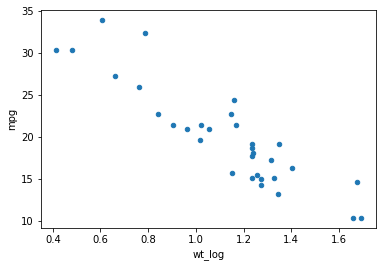

In [82]:
df.plot.scatter(x='wt_log', y='mpg')

## 3. Sample train and test

In [83]:
# 1º with var wt
# x_train, x_test, y_train, y_test = train_test_split(df[['wt']], df['mpg'], test_size=0.25, random_state=123)
# 2º with var wt_log
# x_train, x_test, y_train, y_test = train_test_split(df[['wt_log']], df['mpg'], test_size=0.25, random_state=123)
# 3º with var trasnf Polynomial
x_train, x_test, y_train, y_test = train_test_split(df[['wt']], df['mpg'], test_size=0.25, random_state=33)
x_train, x_test = poly.fit_transform(x_train), poly.fit_transform(x_test)

## 4. Bulding model

In [84]:
mod = LinearRegression()
mod.fit(x_train, y_train)
print(mod.score(x_train, y_train))

0.8451131256252045


## 5. Forecast

In [85]:
from sklearn.metrics import mean_squared_error
y_prev = mod.predict(x_test)

print(mean_squared_error(y_test, y_prev))


10.909693228869378
